In [1]:
import matplotlib.pyplot as plt
import numpy

## 使用pyclustering的kmeans聚类

In [2]:
from pyclustering.cluster.kmeans import kmeans,kmeans_visualizer

In [3]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.center_initializer import random_center_initializer

## 示例数据

In [4]:
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;

In [5]:
sample = read_sample(FCPS_SAMPLES.SAMPLE_LSUN)

In [6]:
xy = numpy.array(sample)

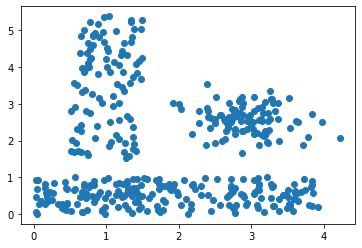

In [7]:
plt.scatter(xy[:,0],xy[:,1])

### 随机中心点算法

In [8]:
initial_centers_rdm = random_center_initializer(sample, 4).initialize()

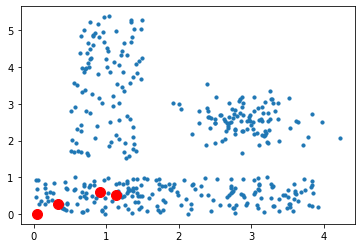

In [9]:
plt.scatter(xy[:,0],xy[:,1],s=10)
plt.scatter(numpy.array(initial_centers_rdm[:])[:,0],
           numpy.array(initial_centers_rdm[:])[:,1],
            s=100,c="red")

### kmeans++算法，初始化选择聚类中心点。

In [10]:
initial_centers_kpp = kmeans_plusplus_initializer(sample, 4).initialize()

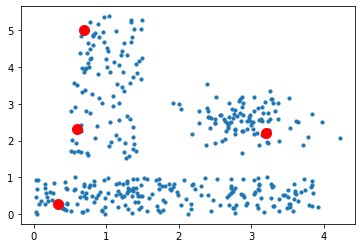

In [11]:
plt.scatter(xy[:,0],xy[:,1],s=10)
plt.scatter(numpy.array(initial_centers_kpp[:])[:,0],
           numpy.array(initial_centers_kpp[:])[:,1],
            s=100,c="red")

### 设置聚类参数和执行聚类

In [12]:
%%time
kmeans_instance = kmeans(sample, initial_centers_rdm)
kmeans_instance.process()

Wall time: 5.97 ms


In [13]:
%%time
kmeans_instance = kmeans(sample, initial_centers_kpp)
kmeans_instance.process()

Wall time: 3.99 ms


## 获取聚类结果和最终聚类的中心点

In [14]:
clusters = kmeans_instance.get_clusters()

In [21]:
for i in range(len(clusters)):
    print(i,": ",clusters[i][:10],"……")

0 :  [3, 8, 10, 11, 14, 15, 18, 24, 29, 30] ……
1 :  [203, 206, 210, 211, 212, 213, 215, 216, 217, 218] ……
2 :  [0, 204, 205, 207, 208, 209, 214, 220, 222, 223] ……
3 :  [1, 2, 4, 5, 6, 7, 9, 12, 13, 16] ……


In [16]:
final_centers = kmeans_instance.get_centers()

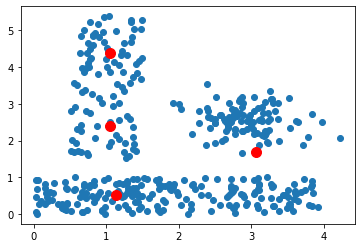

In [17]:
plt.scatter(xy[:,0],xy[:,1])
plt.scatter(numpy.array(final_centers[:])[:,0],
           numpy.array(final_centers[:])[:,1],c="red",s=100)

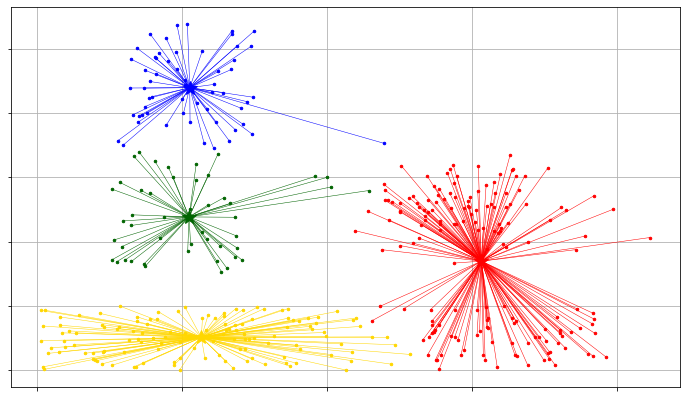

In [18]:
fig = plt.Figure(figsize=(12,7))
kmeans_visualizer.show_clusters(sample, clusters, final_centers,figure=fig)